<h1> <center> A Quantitative Characterization of Ecosystem Structure and Function of the South Florida Wetlands </h1> </center>

## Introduction
Ecological communities are best represented as networks. Knowledge of simple and complex interactions between species in an ecosystem is an additional layer of information that network measures exploit to quantify biodiversity. In this notebook, a food web network in the wetlands of South Florida has been analysed. 


## Data
- In food webs, species are the nodes and feeding interactions are the edges. The edges are directed flows of biomass and energy that occur when one species feeds on another.
- The food web graph used for this analytical study is simple, unweighted, unipartite and directed. In this network, nodes are compartments (organisms and species or sources of energy in the foodweb) and edges represent energy flow (A directed edge from $i$ to $j$ means that carbon is transferred from $i$ to $j$ i.e. organism $j$ eats organism $i$) [$^1$](https://snap.stanford.edu/data/Florida-bay.html).
 
- In addition, vertices are partitioned into different types as follows:  
    1. Living/producing compartment 
    2. Other compartment 
    3. Input 
    4. Output 
    5. Respiration
- Group classification labels (derived from ATLSS) are included with this network data. Example groups include"Zooplankton Microfauna" and "Pelagic Fishes".

## General Problem Statement
- To understand the general structure of the food web network.
- To observe patterns by clustering similar nodes - detecting communities and motifs in the food web.
- Highlight important species in the ecosystem using various centralities.

In [5]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import collections
import itertools
import numpy as np
import community
import seaborn as sns

In [7]:
attr = pd.read_csv('Florida-bay-meta.csv')

In [8]:
name = attr['name'].tolist()
group = attr['group'].tolist()

In [16]:
G = nx.read_edgelist('Florida-bay.txt', create_using=nx.DiGraph())

In [17]:
dict_color = {}
cnt = 0
for i in set(group):
    dict_color[i] = cnt
    cnt = cnt + 1

In [18]:
node_colors = []
for v in G.nodes():
    G.nodes[v]['name'] = name[int(v)]
    G.nodes[v]['group'] = group[int(v)]
    node_colors.append(dict_color[group[int(v)]])

In [19]:
nx.write_gml(G, 'gephi.gml')

In [20]:
label = {}
node_color = []
for nodes in G.nodes():
    label[nodes] = G.nodes[nodes]['name']

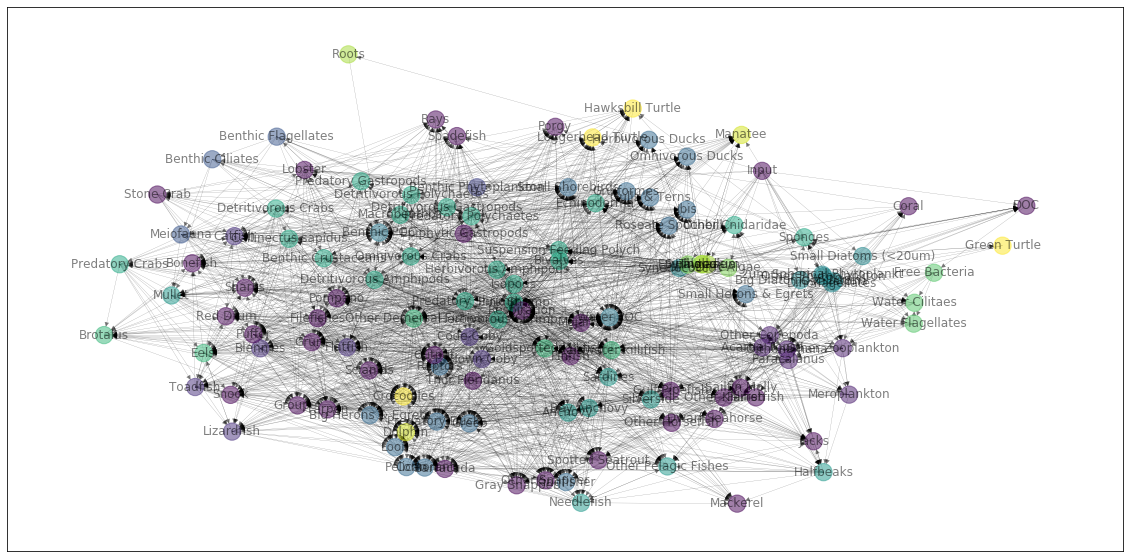

In [21]:
plt.figure(figsize=[20,10])
nx.draw_networkx(G, pos=nx.kamada_kawai_layout(G), size = 10, node_color = node_colors, width=0.2, alpha=0.5, labels=label, with_labels=True)
plt.savefig('1.png')

In [22]:
print('Order of the network is: ' + str(len(G.nodes())))

Order of the network is: 128


Order of the network measures the species richness of the community

In [10]:
print('Size of the network is: ' + str(len(G.edges())))

Size of the network is: 2106


Therefore the number of interactions is 2106

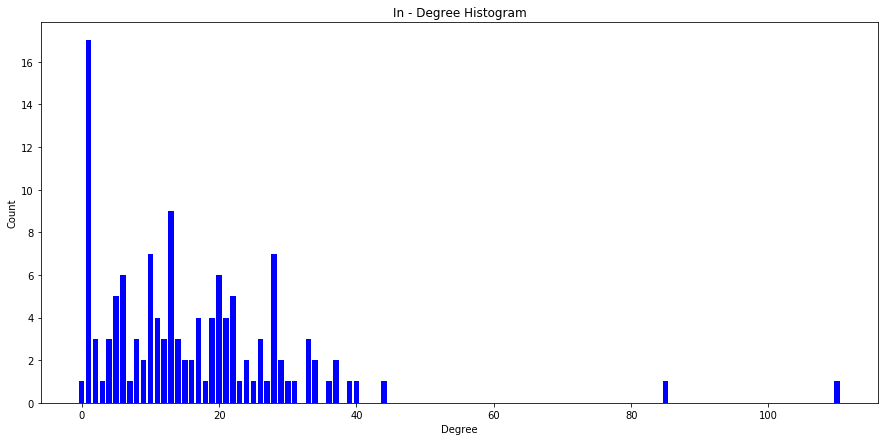

In [11]:
degree_sequence = sorted([d for n, d in G.in_degree()], reverse=True)  # degree sequence
# print "Degree sequence", degree_sequence
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())

fig, ax = plt.subplots(figsize=[15,7])
plt.bar(deg, cnt, width=0.8, color='b')

plt.title("In - Degree Histogram")
plt.ylabel("Count")
plt.xlabel("Degree")
#ax.set_xticks([d for d in deg])
#ax.set_xticklabels(deg)
plt.savefig('degree1.png')
plt.show()


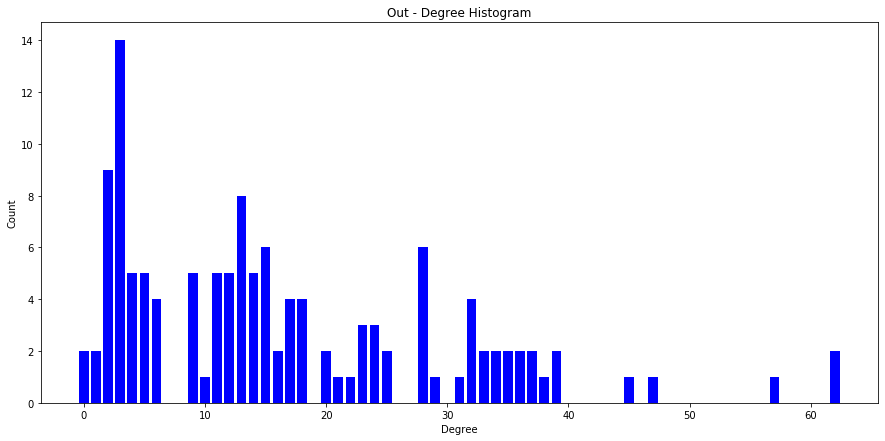

In [12]:
degree_sequence = sorted([d for n, d in G.out_degree()], reverse=True)  # degree sequence
# print "Degree sequence", degree_sequence
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())

fig, ax = plt.subplots(figsize=[15,7])
plt.bar(deg, cnt, width=0.8, color='b')

plt.title("Out - Degree Histogram")
plt.ylabel("Count")
plt.xlabel("Degree")
#ax.set_xticks([d for d in deg])
#ax.set_xticklabels(deg)
plt.savefig('degree2.png')
plt.show()


The out-degree and in-degree of each species represent correspondingly the vulnerability (number of predators) and generality (number of resources).
Both the distributions don’t follow the power law.

## Motif Analysis

Structures formed by groups of multiple nodes can beanalyzed by looking at what types of relationships the nodes (representing a species) are typically embeddeding  (e.g.competition,intraguild  predation  -  intraguild predation is the killing and sometimes eating of potential competitors.  This interaction represents a combination of predation and competition, because both species relyon the same prey resources and also benefit from preyingupon one another), by determining if there are nodes found in dense clusters or non-overlapping compartments,forming modular communities or using motif distribution.

In [26]:
motifs = {
    'S1': nx.DiGraph([(1,2),(2,3)]),
    'S2': nx.DiGraph([(1,2),(1,3),(2,3)]),
    'S3': nx.DiGraph([(1,2),(2,3),(3,1)]),
    'S4': nx.DiGraph([(1,2),(3,2)]),
    'S5': nx.DiGraph([(1,2),(1,3)])
    }

In [27]:
def mcounter(gr, mo):
    """Counts motifs in a directed graph
    :param gr: A ``DiGraph`` object
    :param mo: A ``dict`` of motifs to count
    :returns: A ``dict`` with the number of each motifs, with the same keys as ``mo``
    This function is actually rather simple. It will extract all 3-grams from
    the original graph, and look for isomorphisms in the motifs contained
    in a dictionary. The returned object is a ``dict`` with the number of
    times each motif was found.::
        >>> print mcounter(gr, mo)
        {'S1': 4, 'S3': 0, 'S2': 1, 'S5': 0, 'S4': 3}
    """
    #This function will take each possible subgraphs of gr of size 3, then
    #compare them to the mo dict using .subgraph() and is_isomorphic
    
    #This line simply creates a dictionary with 0 for all values, and the
    #motif names as keys

    mcount = dict(zip(mo.keys(), list(map(int, np.zeros(len(mo))))))
    nodes = gr.nodes()

    #The for each each of the triplets, we (i) take its subgraph, and compare
    #it to all fo the possible motifs
    for trip in itertools.combinations(nodes(),3):
        subg = gr.subgraph(trip)
        for keys in mo.keys():
            if nx.is_isomorphic(subg, mo[keys]):
                mcount[keys] += 1
        
    return mcount

In [ ]:
mcounter(G, motifs)

In [16]:
ans = {'S1': 14650, 'S2': 7909, 'S3': 70, 'S4': 20826, 'S5': 18737}

In [ ]:
plt.bar(ans.keys(),ans.values())
plt.ylabel('frequency of motif')
plt.xlabel('motif type')
plt.savefig('hist.png')

This shows that the network doesn’t have many of the 3-node cycle motif type. The network will generally have cycles with path length more than 3. Also the $2^{nd}$ maximum motif type is of the competition kind.

## Centrality Analysis

Centralities are used to identify possible keystone species in ecological networks.

In [18]:
clust_coeff = nx.clustering(G)

In [19]:
avg_clust = nx.average_clustering(G)

### Betweenness Centrality

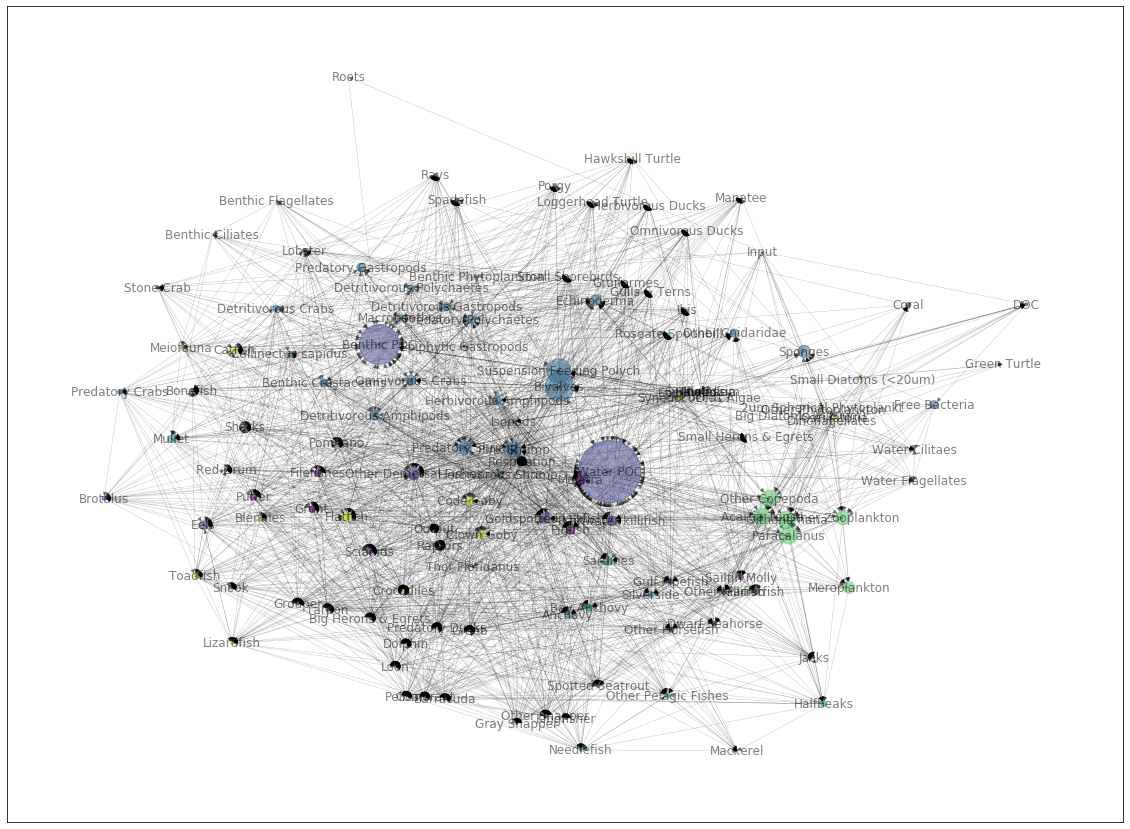

In [143]:
plt.figure(figsize=[20,15])
d = dict(nx.betweenness_centrality(G))

nx.draw_networkx(G, node_list=d.keys(), node_size=[v * 10000 for v in d.values()], pos=nx.kamada_kawai_layout(G),node_color=node_colors, labels=label, alpha=0.5, width=0.2)
plt.savefig('2.png')
This measure is ideal to study the influence of species losson fragmentation processes (Population fragmentationoccurs when groups of animals living in the wild becomeplt.show()

This measure is ideal to study the influence of species losson fragmentation processes (Population fragmentationoccurs when groups of animals living in the wild become separated from other groups of the same species.It isoften caused by habitat fragmentation, which as the nameimplies describes the emergence of discontinuous habitat (fragmentation) in the environment.)


Water POC’ (node 122) has the highest betweennesscentrality out of all the nodes.   The second highest betweenness centrality is that of ’Benthic POC’ (node123). Both of these nodes belongs to the group ’Detritus’.Detrivores consume detritus and almost every organism gets converted into detritus.   Therefore, due to highout-degree of these nodes their betweenness centrality ishigh.

### Eigenvector Cetrality

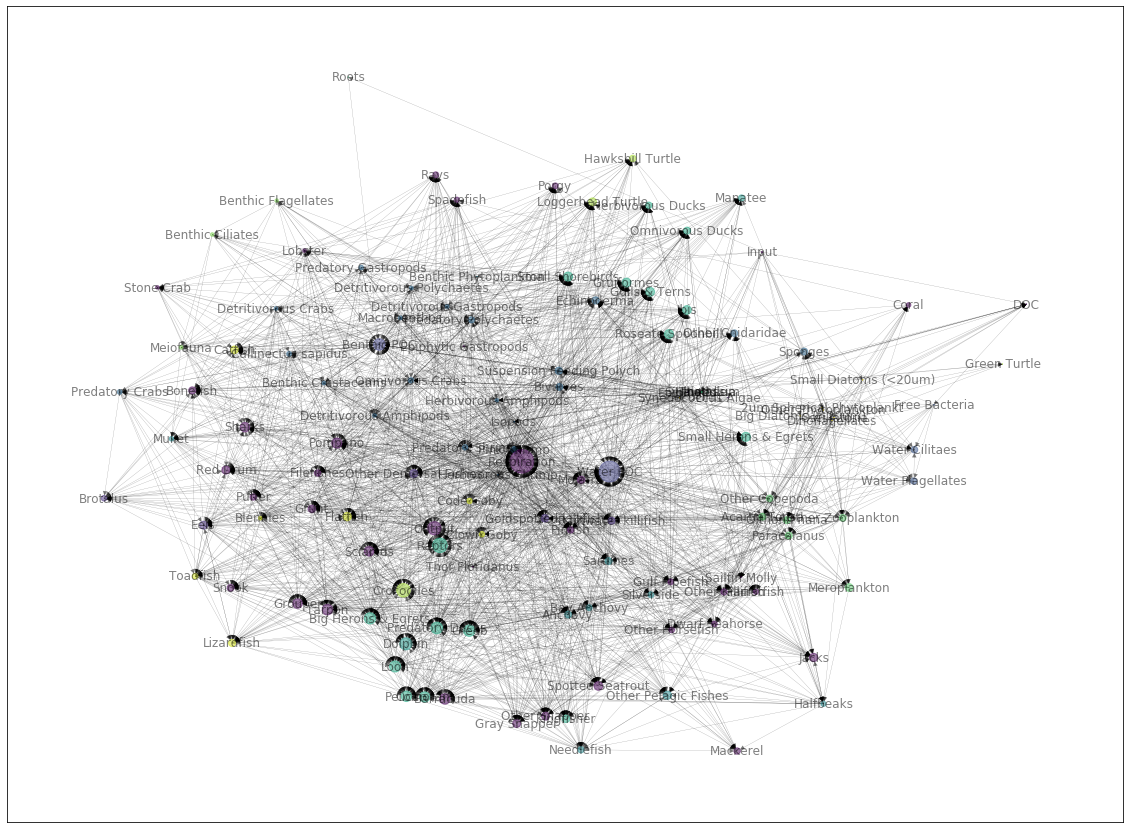

In [145]:
plt.figure(figsize=[20,15])
d = dict(nx.eigenvector_centrality(G))

nx.draw_networkx(G, node_list=d.keys(), node_size=[v * 1000 for v in d.values()], pos=nx.kamada_kawai_layout(G), alpha=0.5,node_color=node_colors,labels=label, width = 0.2)
plt.savefig('3.png')
plt.show()

Species with extreme values of eigenvector centrality can therefore be viewed as strong contributors to the stability or instability of a food web.

As ’Respiration’ is connected to all the living organisms,the out-degree is high and will be connected to importantnodes which leads to the highest eigenvector centrality.The second highest eigenvector centrality is that of ’WaterPOC’ (node 122). This measure shows a similarity withthe results of the betweenness centrality in this case.The $3^{rd}$ highest value is that of the raptor species, followed by Avifauna as the $4^{th}$.

### Closeness Centrality

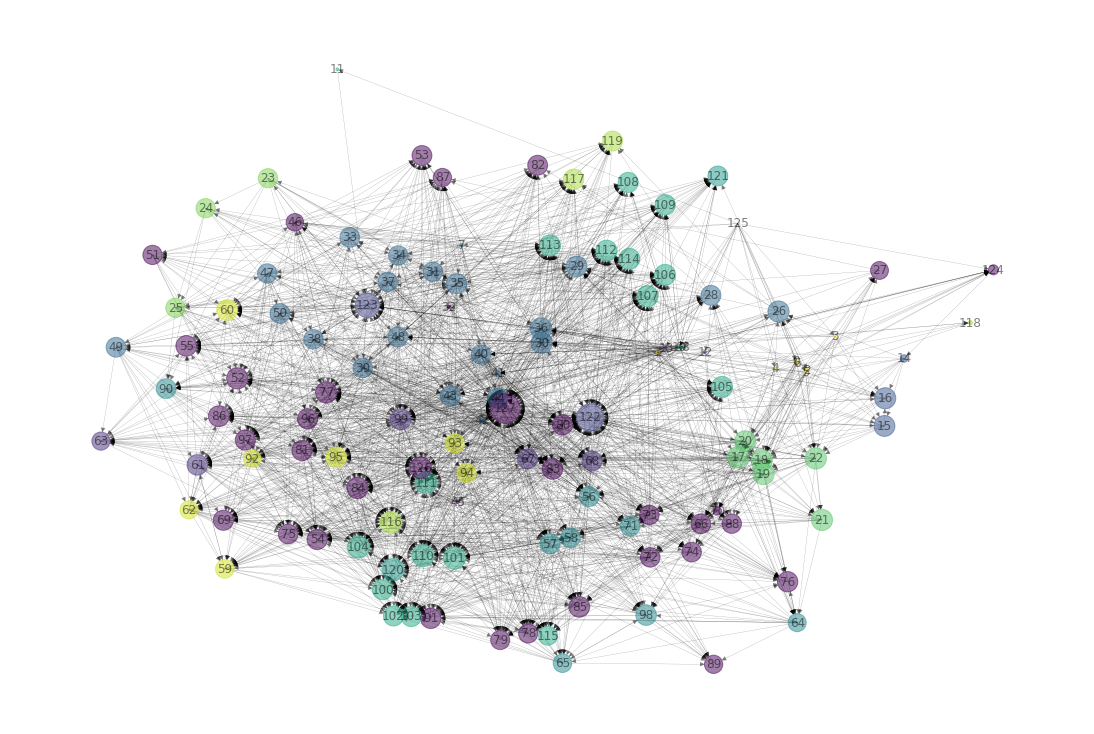

In [22]:
plt.figure(figsize=[15,10])
d = dict(nx.closeness_centrality(G))

nx.draw(G, node_list=d.keys(), node_size=[v * 1000 for v in d.values()], pos=nx.kamada_kawai_layout(G), alpha=0.5,node_color=node_colors,with_labels=True, width = 0.2)
plt.savefig('4.png')
plt.show()

Similarly, ’Respiration’ has the highest closeness centrality of all the nodes. Therefore, respiration is the node which will influence the whole network the most rapidly. Almost every living organisms gets carbon through respiration so it has the highest closeness centrality.The second highest closeness centrality is that of ’WaterPOC’ (node 122). This measure shows a similarity withthe results of the betweenness and eigenvector centralities in this case.

The $3^{rd}$ highest value is that of the Benthic node while the $4^{th}$ highest closeness centrality is that of a living species and not a source of energy - the dolphin.

## Community Detection and Analysis

Structures formed by groups of multiple nodes can beanalyzed by looking at what types of relationships thenodes (representing a species) are typically embeddedin  (e.g.competition,intraguild  predation  -  intraguildpredation is the killing and sometimes eating of potentialcompetitors.  This interaction represents a combinationof predation and competition, because both species relyon the same prey resources and also benefit from preyingupon one another), by determining if there are nodesfound in dense clusters or non-overlapping compartments,forming modular communities or using motif distribution.

In [23]:
hubs, authorities = nx.hits(G)

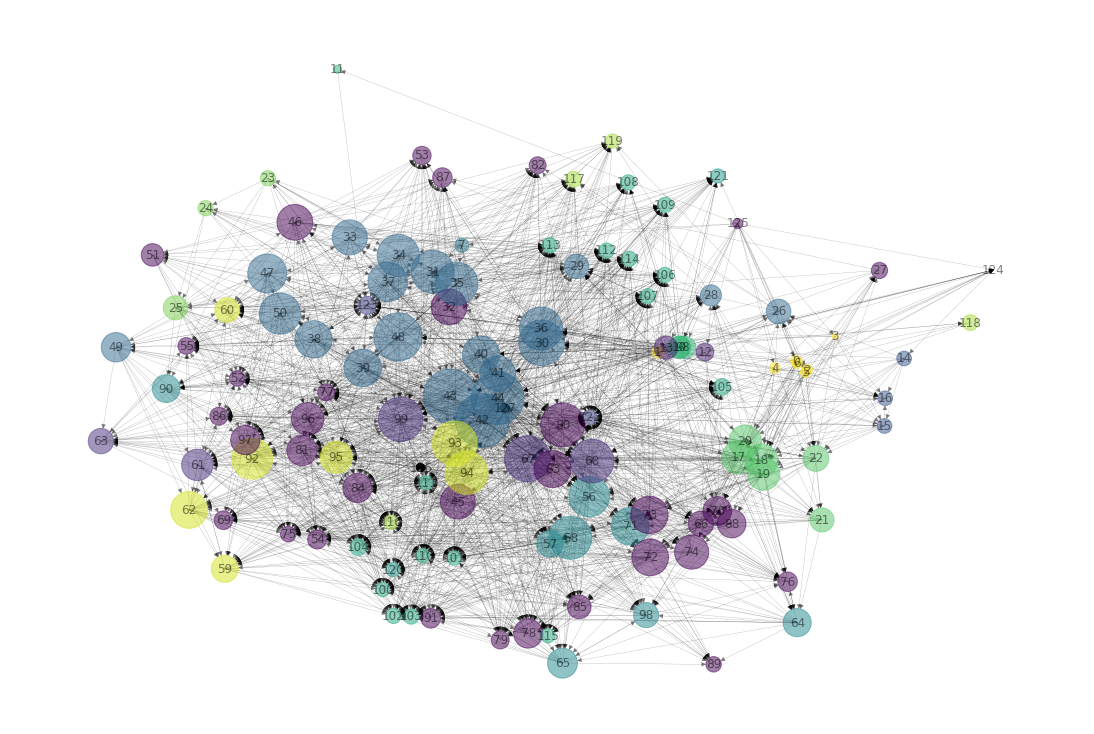

In [24]:
node_size=[100000*hubs[node] for node in hubs]
plt.figure(figsize=(15, 10))
nx.draw(G, nx.kamada_kawai_layout(G), alpha=0.5, with_labels=True, node_color=node_colors, node_size=node_size, width=0.2)

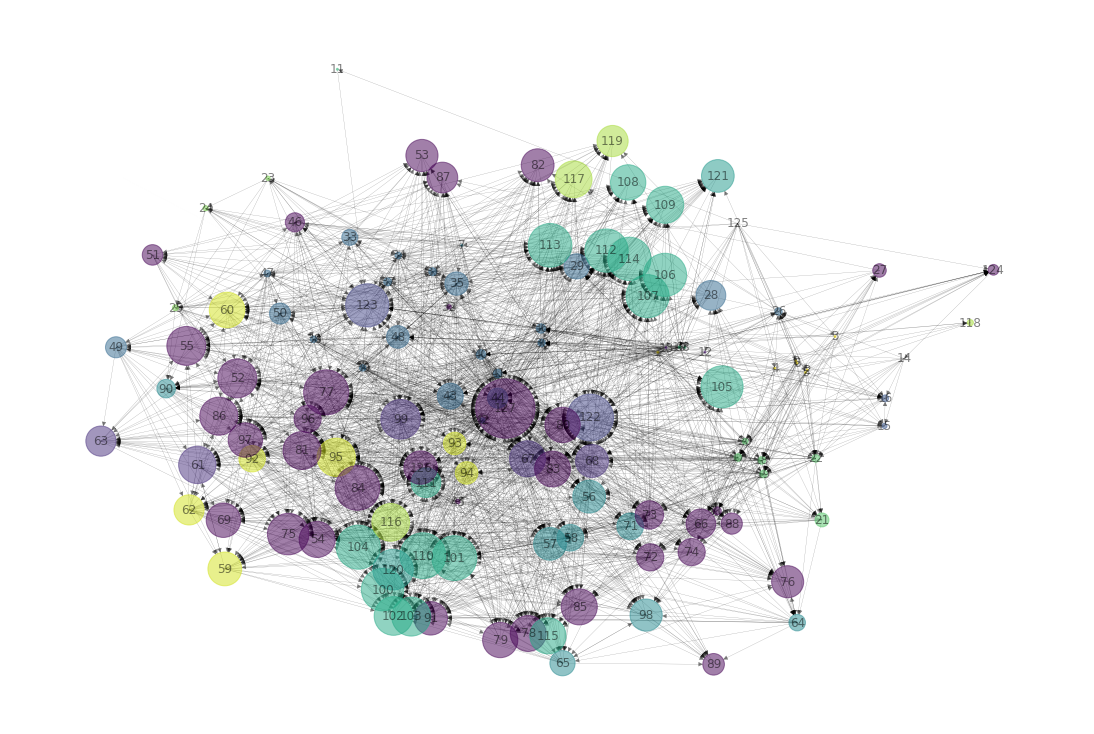

In [25]:
node_size=[100000*authorities[node] for node in authorities]
plt.figure(figsize=(15, 10))
nx.draw(G, nx.kamada_kawai_layout(G), alpha=0.5, with_labels=True, node_color=node_colors, node_size=node_size, width=0.2)

In [26]:
G1 = G.to_undirected()

In [72]:
partition = community.best_partition(G1)

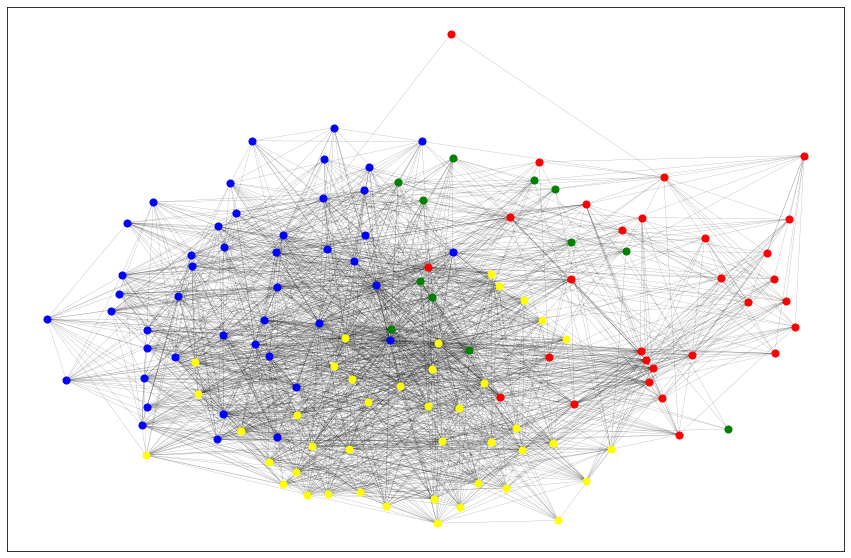

In [73]:


#drawing
size = float(len(set(partition.values())))
pos = nx.kamada_kawai_layout(G1)
count = 0
node_color = ['red','blue','green','yellow','orange']
plt.figure(figsize=(15,10))

for com in set(partition.values()) :
    count = count + 1
    list_nodes = [nodes for nodes in partition.keys() if partition[nodes] == com]
    nx.draw_networkx_nodes(G1, pos, list_nodes, node_size = 50, node_color = node_color[count-1], label=name, with_labels=True)

nx.draw_networkx_edges(G1, pos, alpha=0.5, width=0.2)
plt.savefig('louvain.png')
plt.show()

In [74]:
list_nodes = []
names = []
groups = []
for com in set(partition.values()):
    temp = [nodes for nodes in partition.keys() if partition[nodes] == com]
    list_nodes.append(temp)
    names.append([name[int(nodes)] for nodes in temp])
    groups.append([group[int(nodes)] for nodes in temp])

In [75]:
for element in list_nodes[0]:
    print(list(G.predecessors(element)))

[]
['125']
['125']
['125']
['125']
['125']
['125']
['125']
['125']
['125']
['0', '1', '2', '3', '4', '5', '6', '8', '9', '10', '12', '13', '125']
['124']
['0', '1', '3', '14', '122']
['0', '1', '3', '4', '5', '6', '14', '15', '122']
['0', '1', '2', '3', '4', '5', '6', '14', '15', '16', '122']
['0', '1', '2', '3', '4', '5', '6', '14', '15', '16', '122']
['0', '1', '2', '3', '4', '5', '6', '14', '15', '16', '122']
['0', '1', '3', '14', '15', '122']
['5', '17', '18', '19', '20', '22', '122', '125']
['0', '1', '2', '3', '4', '5', '6', '14', '15', '16', '122']
['0', '1', '3', '4', '5', '6', '14', '15', '16', '122']
['3', '4', '17', '18', '19', '20', '22']
['17', '18', '19', '20', '21', '22', '38', '39', '40', '41', '42', '43', '45', '66', '67', '92', '94']
['0', '4', '5', '6', '17', '18', '19', '20', '21', '22', '30', '31', '37', '38', '39', '40', '41', '42', '43', '45']
['0', '1', '2', '6', '7', '13', '17', '18', '19', '20', '22', '25', '26', '28', '30', '31', '38', '39', '40', '41', '123'

In [31]:
label = {}
node_color = []
for nodes in G1.nodes():
    label[nodes] = G1.nodes[nodes]['group']
    node_color.append(partition[nodes])

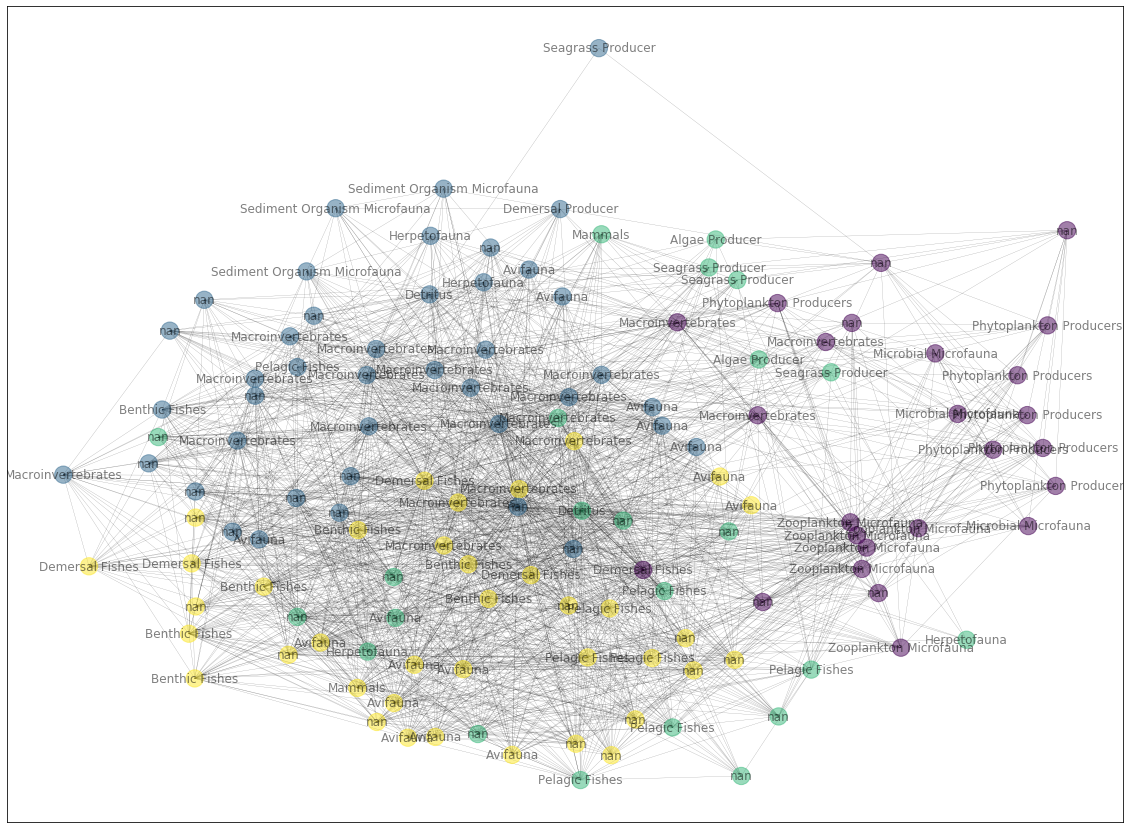

In [32]:
plt.figure(figsize=(20,15))
nx.draw_networkx(G1, pos = nx.kamada_kawai_layout(G1), node_color=node_color, labels=label, alpha=0.5,width=0.2)
plt.savefig('louvian.png')

In [33]:
d = dict(nx.eigenvector_centrality(G))

In [34]:
temp = list(d.values())
print(sorted(d.items(), key = lambda kv:(kv[1], kv[0])))
#t = [keys for keys in d.keys() if d[keys]==max(temp)]

[('125', 6.874748154920593e-26), ('0', 1.5811920756317362e-24), ('1', 1.5811920756317362e-24), ('10', 1.5811920756317362e-24), ('11', 1.5811920756317362e-24), ('12', 1.5811920756317362e-24), ('13', 1.5811920756317362e-24), ('2', 1.5811920756317362e-24), ('3', 1.5811920756317362e-24), ('4', 1.5811920756317362e-24), ('5', 1.5811920756317362e-24), ('6', 1.5811920756317362e-24), ('7', 1.5811920756317362e-24), ('8', 1.5811920756317362e-24), ('9', 1.5811920756317362e-24), ('32', 1.7461860313498303e-23), ('45', 1.7461860313498303e-23), ('118', 3.485497314544741e-23), ('42', 3.485497314544741e-23), ('41', 6.964119880934559e-23), ('70', 1.5660676296909103e-22), ('124', 2.1029854605902063e-22), ('14', 1.4784833381972217e-21), ('23', 0.012205273353092188), ('40', 0.012205273353092188), ('46', 0.012829132225056248), ('51', 0.012947164169113205), ('24', 0.013318355158025997), ('47', 0.013530633165693882), ('92', 0.013833377911576242), ('25', 0.014532947157942169), ('34', 0.014532947157942169), ('38

In [63]:
partition = nx.algorithms.community.greedy_modularity_communities(G1)

In [64]:
arr = []
for i in range(len(partition)):
    arr.append(list(partition[i]))

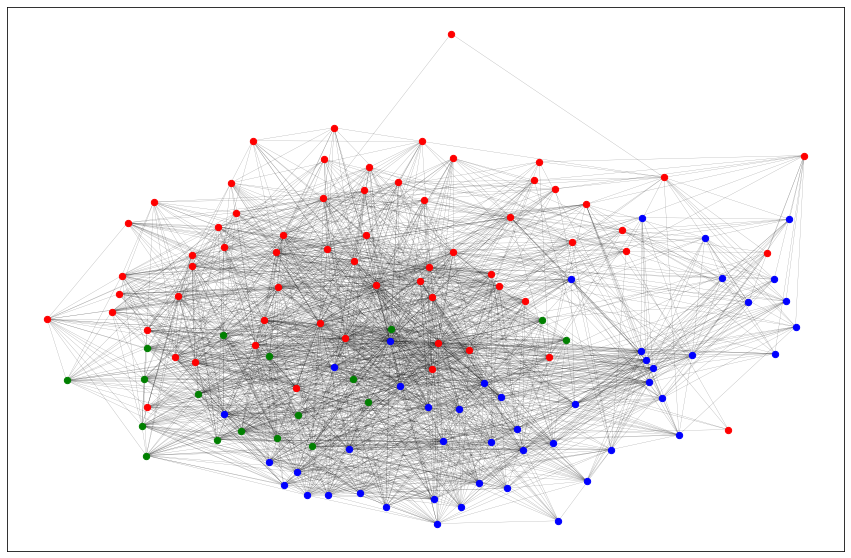

In [65]:
plt.figure(figsize=[15,10])
pos = nx.kamada_kawai_layout(G1)
count = 0
size = len(arr)
node_colors = ['red','blue','green']
list_nodes = []
names = []
groups = []
for com in arr:
    count = count + 1
    nx.draw_networkx_nodes(G1, pos, com, node_size = 40, node_color = node_colors[count-1],with_labels=True)
    list_nodes.append(com)
    names.append([name[int(nodes)] for nodes in com])
    groups.append([group[int(nodes)] for nodes in com])

nx.draw_networkx_edges(G1, pos, alpha=0.5, width=0.2)
plt.show()

In [67]:
for element in list_nodes[0]:
    print(list(G.neighbors(element)))

['123']
['40', '41', '43', '44', '48', '64', '83', '99', '108', '109', '121', '122', '123', '124', '126']
['49', '50', '52', '53', '54', '55', '59', '60', '61', '62', '63', '67', '68', '69', '75', '77', '83', '87', '92', '96', '97', '106', '108', '109', '112', '113', '114', '116', '117', '119', '123', '127']
['70', '83', '88', '90', '99', '122', '123', '124', '126']
['51', '52', '53', '54', '55', '60', '75', '84', '87', '97', '100', '101', '106', '107', '112', '113', '114', '116', '117', '119', '123', '126', '127']
['23', '24', '25', '29', '31', '34', '35', '37', '38', '39', '40', '42', '44', '47', '70', '99', '123']
['35', '46', '60', '88', '96', '97', '99', '101', '117', '119', '121', '123', '127']
['52', '54', '61', '75', '76', '77', '78', '79', '91', '98', '100', '101', '102', '103', '104', '105', '107', '110', '111', '116', '120', '122', '126', '127']
['111', '122', '127']
['35', '43', '48', '53', '55', '60', '61', '67', '77', '80', '81', '82', '83', '84', '88', '93', '94', '95', 

In [68]:
partition = list(nx.algorithms.community.k_clique_communities(G1, 8))

In [69]:
arr = []
for i in range(len(partition)):
    arr.append(list(partition[i]))

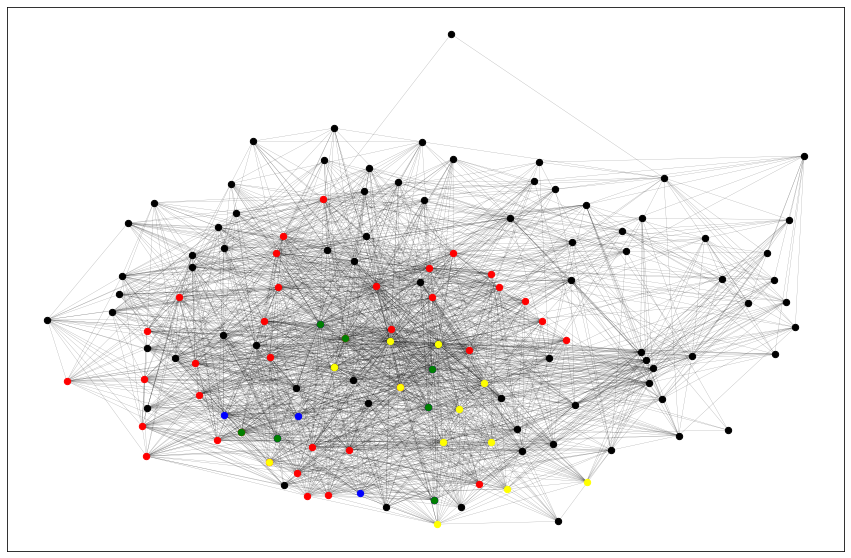

In [70]:
plt.figure(figsize=[15,10])
pos = nx.kamada_kawai_layout(G1)
count = 0
size = len(arr)
node_colors = ['red','blue','green','yellow','orange']
list_nodes = []
names = []
groups = []
remaining = list(G1.nodes())
for com in arr:
    remaining = [c for c in remaining if c not in com]
    count = count + 1
    nx.draw_networkx_nodes(G1, pos, com, node_size = 40, node_color = node_colors[count-1])
    list_nodes.append(com)
    names.append([name[int(nodes)] for nodes in com])
    groups.append([group[int(nodes)] for nodes in com])

nx.draw_networkx_nodes(G1, pos, remaining, node_size = 40, node_color = 'black')
nx.draw_networkx_edges(G1, pos, alpha=0.5, width=0.2)
plt.show()

In [77]:
for element in list_nodes[1]:
    print(element,":",list(G.predecessors(element)))

7 : ['125']
23 : ['7', '123']
123 : ['7', '8', '9', '10', '11', '12', '13', '23', '24', '25', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '43', '44', '46', '47', '48', '49', '50', '51', '53', '61', '62', '63', '80', '90', '93', '94', '95', '99', '122']
24 : ['7', '23', '123']
25 : ['7', '23', '24', '123']
38 : ['1', '7', '23', '24', '123']
39 : ['1', '7', '23', '24', '123']
31 : ['1', '7', '23', '24', '25', '123']
32 : ['13']
33 : ['30', '31', '60', '71', '95']
60 : ['29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '42', '43', '44', '46', '47', '48', '49', '50', '51', '62', '63', '123']
95 : ['17', '18', '19', '20', '21', '22', '25', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '48', '62', '63', '92', '93', '94', '99']
34 : ['1', '7', '23', '24', '123']
35 : ['7', '23', '24', '25', '29', '30', '34', '36', '37', '38', '39', '40', '41', '123']
36 : ['0', '1', '3', '4', '5', '6', '15', '16', '22', '23', '2

In [95]:
G2 = nx.read_pajek('baywet.net')

In [98]:
len(G.edges())

2106

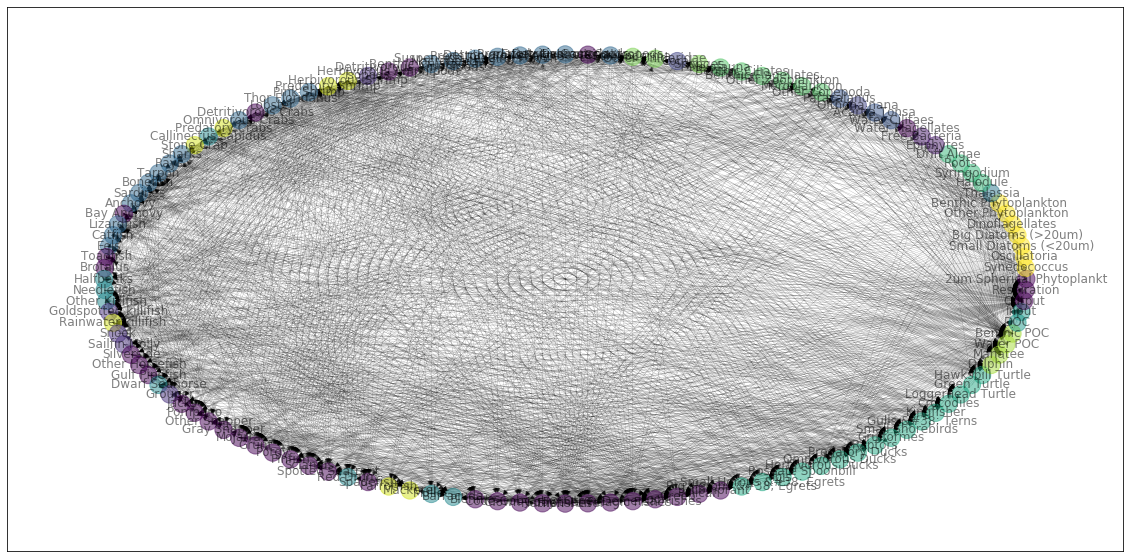

In [105]:
plt.figure(figsize=[20,10])
nx.draw_networkx(G2, pos=nx.circular_layout(G2),node_color=node_colors, size = 10, width=0.2, alpha=0.5)
plt.savefig('1.png')

In [127]:
G3 = G2.to_undirected()
partition = community.best_partition(G3)
#drawing
size = float(len(set(partition.values())))

In [128]:
partition

{'2um Spherical Phytoplankt': 0,
 'Synedococcus': 1,
 'Oscillatoria': 0,
 'Small Diatoms (<20um)': 0,
 'Big Diatoms (>20um)': 0,
 'Dinoflagellates': 0,
 'Other Phytoplankton': 0,
 'Benthic Phytoplankton': 0,
 'Thalassia': 2,
 'Halodule': 0,
 'Syringodium': 0,
 'Roots': 3,
 'Drift Algae': 4,
 'Epiphytes': 5,
 'Free Bacteria': 6,
 'Water Flagellates': 7,
 'Water Cilitaes': 0,
 'Acartia Tonsa': 0,
 'Oithona nana': 0,
 'Paracalanus': 0,
 'Other Copepoda': 0,
 'Meroplankton': 0,
 'Other Zooplankton': 0,
 'Benthic Flagellates': 8,
 'Benthic Ciliates': 0,
 'Meiofauna': 9,
 'Sponges': 0,
 'Coral': 0,
 'Other Cnidaridae': 0,
 'Echinoderma': 0,
 'Bivalves': 0,
 'Detritivorous Gastropods': 0,
 'Epiphytic Gastropods': 0,
 'Predatory Gastropods': 0,
 'Detritivorous Polychaetes': 0,
 'Predatory Polychaetes': 0,
 'Suspension Feeding Polych': 0,
 'Macrobenthos': 0,
 'Benthic Crustaceans': 0,
 'Detritivorous Amphipods': 0,
 'Herbivorous Amphipods': 0,
 'Isopods': 0,
 'Herbivorous Shrimp': 0,
 'Predator

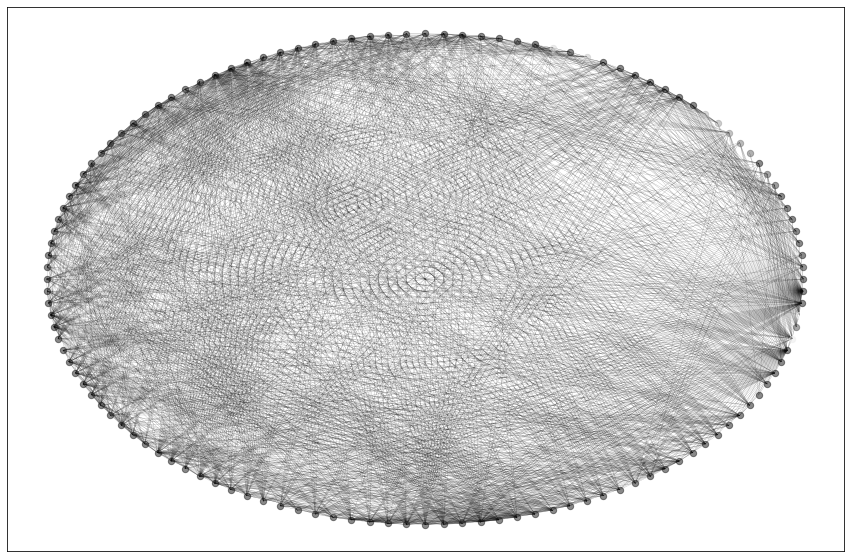

In [125]:
plt.figure(figsize=[15,10])
size = float(len(set(partition.values())))
pos = nx.circular_layout(G3)
count = 0.
for com in set(partition.values()) :
    count = count + 1.
    list_nodes = [nodes for nodes in partition.keys()
                                if partition[nodes] == com]
    nx.draw_networkx_nodes(G3, pos, list_nodes, node_size = 40,
                                node_color = str(count / size),alpha=0.5,with_labels=True)


nx.draw_networkx_edges(G3, pos, alpha=0.5, width=0.2)
plt.show()

In [130]:
partition = list(nx.algorithms.community.girvan_newman(G2))

Interestingly, we don’t get a clear distinction between each group through community detection. Many groups are evenly distributed in all the communities. This phenomenon presumably indicates that the roles of these species in the carbon exchange cannot be derived fromthe traditional divisions in a trivial manner. For example,though both are mammals, the manatee and the dolphin have very diverse diets. The manatee feeds on submergent aquatic vegetation, and the dolphin feeds on small fishesand shrimps.  Consequently, one would expect that themanatee and the dolphin play different roles in the carbon exchange.